<center><h1> Learning XOR Function using a Multi-Layer Perceptron </h1></center>

This notebook will introduce you to the basics of Multi-Layer Perceptrons (MLPs) and how they can be used to learn simple-to-complex functions via iterative updates. We will take a look at the XOR function which is a classic exmaple of non-linearly separable dataset. The implementation will help you gain a basic understanding of th MLPs and their programming. But first, let's understand the problem setup. 

The XOR function consists of two inputs, each taking binary values of 0 and 1. The output of these two inputs is a binary value indicating that only one of the two inputs is high,i.e.- the XOR will output a 1 if our two inputs $(x_{1},x_{2}) = (0,1)$ and $(x_{1},x_{2}) = (1,0)$. For the remaining two cases, XOR will output a 0. This can be summarized as follows-

<center>$x_{1}\qquad x_{2}\qquad y\qquad$</center>  

<center>$0\qquad 0\qquad 0\qquad$</center>
<center>$0\qquad 1\qquad 1\qquad$</center>
<center>$1\qquad 0\qquad 1\qquad$</center>
<center>$1\qquad 1\qquad 0\qquad$</center>

### 1. Initialize Learning Setup

We will not initialize our problem setup as discussed above. X and $y$ will be our input dataset and labels respectively which we will feed into the MLP.  

Next we will design the architecture of our MLP by instantiating the number of layers and the number of units in each layer.  

Now we move on to the hyperparameters of our network. We will use regularization to a very small extent and initialize the learning rate and number of iterations. Feel free to play around with these values and see how your learning varies.  

And finally, we will initialize the weights and biases to random values as per appropriate dimensions of our dataset.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys

#Initialize inputs and labels
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

# Number of units in MLP
num_i_units = 2
num_h_units = 2
num_o_units = 1

#Hyperparameters
learning_rate = 0.1     # 0.001, 0.01
reg_param = -0.0001           # 0.001, 0.01
max_iter = 20000         # 500, 1000
m = 4 

#Initialize weights and biases to random values
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2
B1 = np.random.random((num_h_units, 1))                 # 2x1
B2 = np.random.random((num_o_units, 1))                 # 1x1

#Sigmoid activation for units
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

dW1 = 0
dW2 = 0

dB1 = 0
dB2 = 0

cost = np.zeros((max_iter+1, 1))


### Forward Propagation

We define our forward propagation function which will pass our dataset forward into the MLP units and aid us in making predictions as well. The equations for the forward propagation are as follows- 

<center>$z_{1} = W_{1}^{T}a_{0} = B_{1}$</center>
<center>$a_{1} = \sigma(z_{1})$</center>
<center>$z_{2} = W_{2}^{T}a_{1} = B_{2}$</center>
<center>$a_{2} = \sigma(z_{2})$</center>

Try computing the dimensions for each array by yourself before you move forward. 

In [0]:
#Forward propagation
def forward(x, predict=False):
    a0 = x.reshape(x.shape[0], 1)
    z1 = W1.dot(a0) + B1    # 2x2 * 2x1 + 2x1 = 2x1
    a1 = sigmoid(z1)        # 2x1
    z2 = W2.dot(a1) + B2    # 1x2 * 2x1 + 1x1 = 1x1
    a2 = sigmoid(z2)

    if predict: return a2
    return a0, a1, a2


### Learning through Backpropagation

We will now write the backpropagation algorithm using chain rule of differentiation. It is important that your dimensions match while multiplying the Jacobians to the child nodes. Following are the equations for backpropagation step- 

<center>$\bar{z_{2}} = a_{2} - y$</center>
<center>$\bar{W_{2}} = Z_{2}.a_{1}^{T}$</center>
<center>$\bar{z_{1}} = W_{2}^{T}.\bar{z_{2}}.\sigma(a_{1})$</center>
<center>$\bar{W_{1}} = z_{1}.a_{0}^{T}$</center>
<center>$\bar{b_{1}} = z_{1}$</center>
<center>$\bar{b_{2}} = z_{2}$</center>


In [0]:
#Iterate for max_iterations
for i in range(max_iter+1):
    c = 0

    dW1 = 0
    dW2 = 0

    dB1 = 0
    dB2 = 0

    #Iterate over each sample in the dataset
    for j in range(m):
        
        # Forward Prop.
        a0, a1, a2 = forward(X[j])

        # Back prop.
        dz2 = a2 - y[j]                                         # 1x1
        dW2 += dz2 * a1.T                                       # 1x1 .* 1x2 = 1x2
        dz1 = np.multiply((W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
        dW1 += dz1.dot(a0.T)                                    # 2x1 * 1x2 = 2x2
        dB1 += dz1                                              # 2x1
        dB2 += dz2                                              # 1x1

        #Update cost
        c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
    
    #Update weights and biases
    W1 = W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * W1)
    W2 = W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * W2)
    B1 = B1 - learning_rate * (dB1 / m)
    B2 = B2 - learning_rate * (dB2 / m)

    cost[i] = (c / m) + ((reg_param / (2 * m)) * (np.sum(np.power(W1, 2)) + np.sum(np.power(W2, 2))))
    print('Iteration: {}/{} | Loss: {}'.format(i,max_iter,c))


Streaming output truncated to the last 5000 lines.
Iteration: 15002/20000 | Loss: [[0.06396112]]
Iteration: 15003/20000 | Loss: [[0.06395904]]
Iteration: 15004/20000 | Loss: [[0.06395697]]
Iteration: 15005/20000 | Loss: [[0.06395489]]
Iteration: 15006/20000 | Loss: [[0.06395282]]
Iteration: 15007/20000 | Loss: [[0.06395074]]
Iteration: 15008/20000 | Loss: [[0.06394867]]
Iteration: 15009/20000 | Loss: [[0.0639466]]
Iteration: 15010/20000 | Loss: [[0.06394452]]
Iteration: 15011/20000 | Loss: [[0.06394245]]
Iteration: 15012/20000 | Loss: [[0.06394038]]
Iteration: 15013/20000 | Loss: [[0.06393831]]
Iteration: 15014/20000 | Loss: [[0.06393624]]
Iteration: 15015/20000 | Loss: [[0.06393417]]
Iteration: 15016/20000 | Loss: [[0.0639321]]
Iteration: 15017/20000 | Loss: [[0.06393003]]
Iteration: 15018/20000 | Loss: [[0.06392796]]
Iteration: 15019/20000 | Loss: [[0.06392589]]
Iteration: 15020/20000 | Loss: [[0.06392382]]
Iteration: 15021/20000 | Loss: [[0.06392175]]
Iteration: 15022/20000 | Loss: 

### Make Predictions and Plot Learning

And finally, we predict the output based on what our MLP learnt. We can also visualize the learning by plotting the cost function values over epochs. This gives a good understanding of how training progresses and how various hyperparameters affect the progress of the model.



[0 1]
[[0.98614259]]


[1 0]
[[0.98470972]]


[1 1]
[[0.01381809]]


[0 0]
[[0.01399836]]


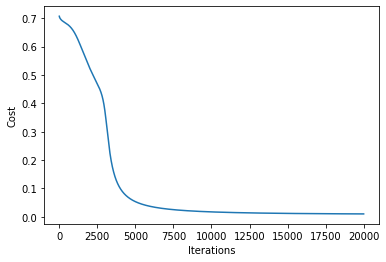

In [0]:
for x in X:
    print("\n")
    print(x)
    print(forward(x, predict=True))

plt.plot(range(max_iter+1), cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()